In [4]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

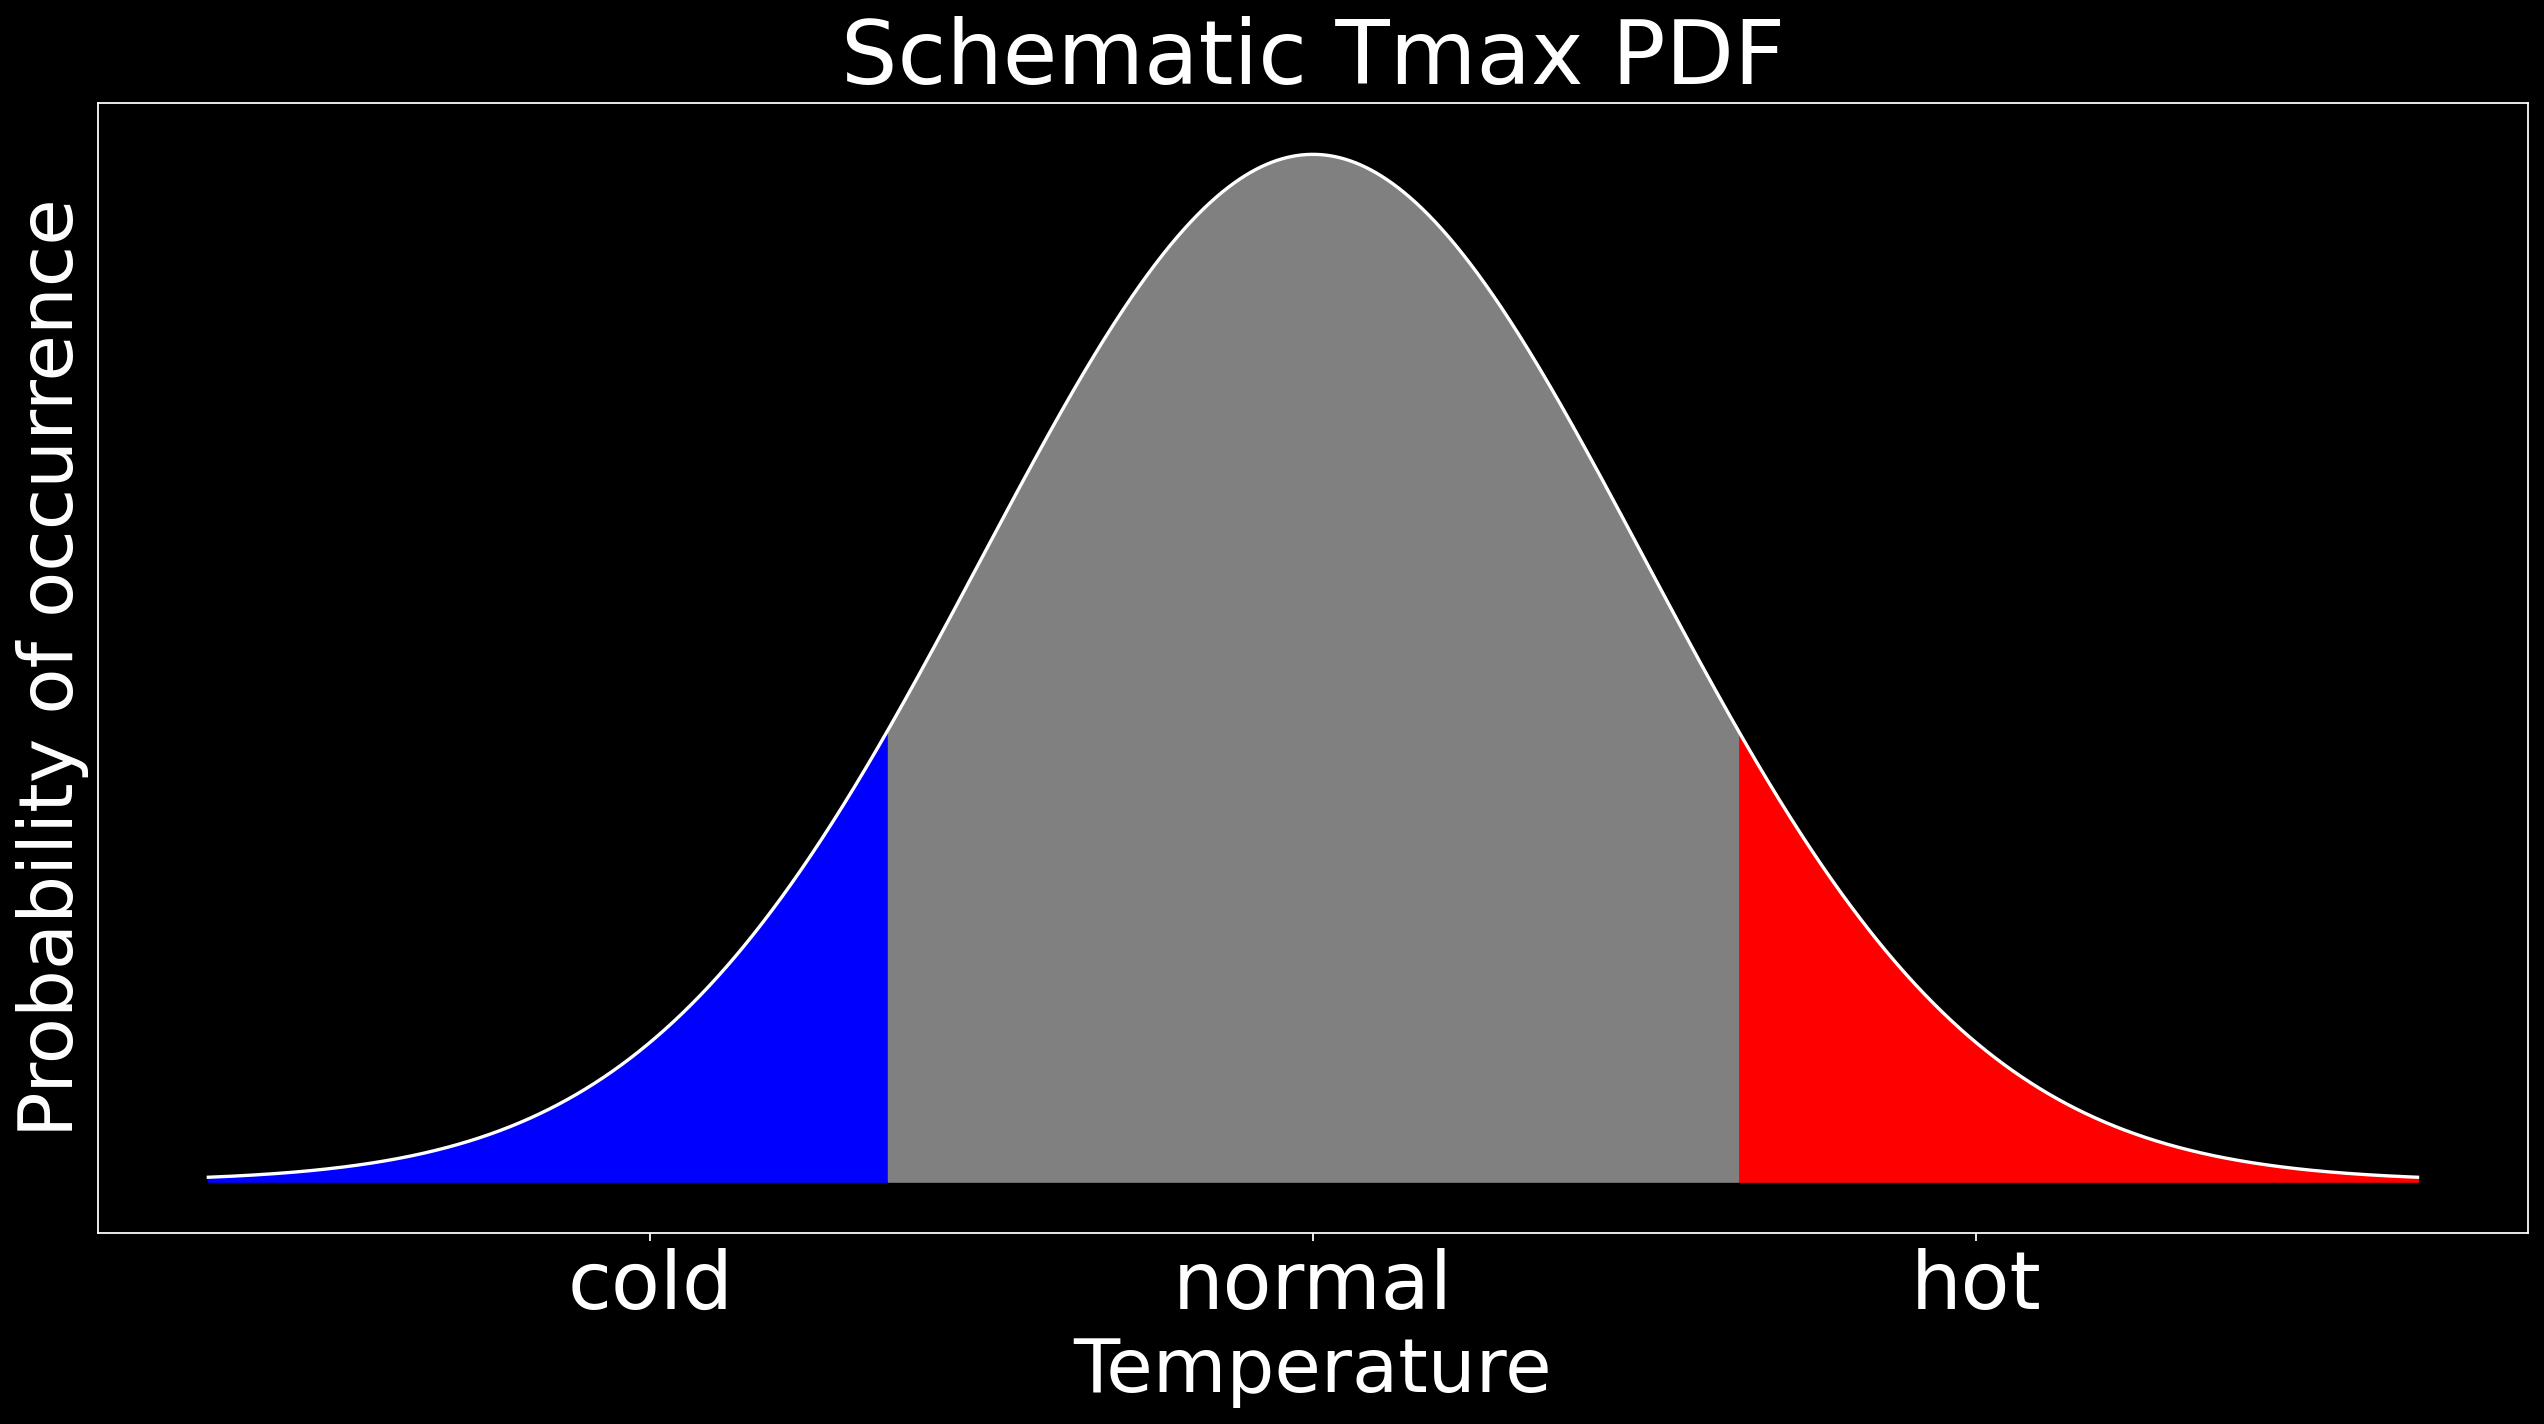

In [105]:
PDF = stats.norm(50,15)
x = np.linspace(0,100,10000)
rho = PDF.pdf(x)
cdf = PDF.cdf(x)

plt.figure(figsize = (16, 9),
           dpi = 160)
plt.style.use('dark_background')

plt.plot(x, rho, "w-")
plt.fill_between(x[np.argmax(cdf>0.9):], 
                 np.zeros((rho.shape))[np.argmax(cdf>0.9):], 
                 rho[np.argmax(cdf>0.9):],
                 color = "r")
plt.fill_between(x[:np.argmin(cdf<0.1)], 
                 np.zeros((rho.shape))[:np.argmin(cdf<0.1)], 
                 rho[:np.argmin(cdf<0.1)],
                 color = "b")
plt.fill_between(x[np.argmin(cdf<0.1):np.argmax(cdf>0.9)], 
                 np.zeros((rho.shape))[np.argmin(cdf<0.1):np.argmax(cdf>0.9)], 
                 rho[np.argmin(cdf<0.1):np.argmax(cdf>0.9)],
                 color = "gray")
plt.xticks([20, 50, 80], ["cold", "normal", "hot"], fontsize = 36)
plt.yticks([])
plt.xlabel("Temperature", fontsize = 34)
plt.ylabel("Probability of occurrence", fontsize = 34)
plt.title("Schematic Tmax PDF", fontsize = 40)
plt.tight_layout()
plt.savefig("TEST.png")

In [41]:
def PDF(x,mu,std):
    return stats.norm(mu, std).pdf(x)
x = np.linspace(-1,1,2000)
rho  = PDF(x,0,1e-1)

# x = location, rho = density in given location, n_step = number of time step, t_size = size of each step 
def LE_method(x,rho,n_step,t_size):
    det = np.zeros((len(x),n_step))
    sp = np.zeros((len(x),n_step))
    for count in range(n_step): # forward for 1 time steps
        xi   = x
        
        xint = 0
        for i in np.arange(0,100,1):
            tp = i*t_size/100
            x  = xi*np.exp(tp)*(1-0.25*xi*xi+0.25*xi*xi*np.exp(2*tp))**(-1/2)
            c  = 4-3*x*x
            xint += c
        sp[:, count] = x
        rho  = rho*np.exp(-xint*t_size/100)
        rho  = rho/np.trapz(rho,x)
        det[:,count] = np.exp(-xint*t_size/100)
    return x,rho, det, sp

In [66]:
x1, rho1, _, _ = LE_method(x, rho,  50, 0.01)
x2, rho2, _, _ = LE_method(x, rho, 100, 0.01)
x3, rho3, _, _ = LE_method(x, rho, 150, 0.01)
x4, rho4, _, _ = LE_method(x, rho, 200, 0.01)
x5, rho5, _, _ = LE_method(x, rho, 300, 0.01)
xp, rhop, detp, sp = LE_method(x, rho, 300, 0.05)

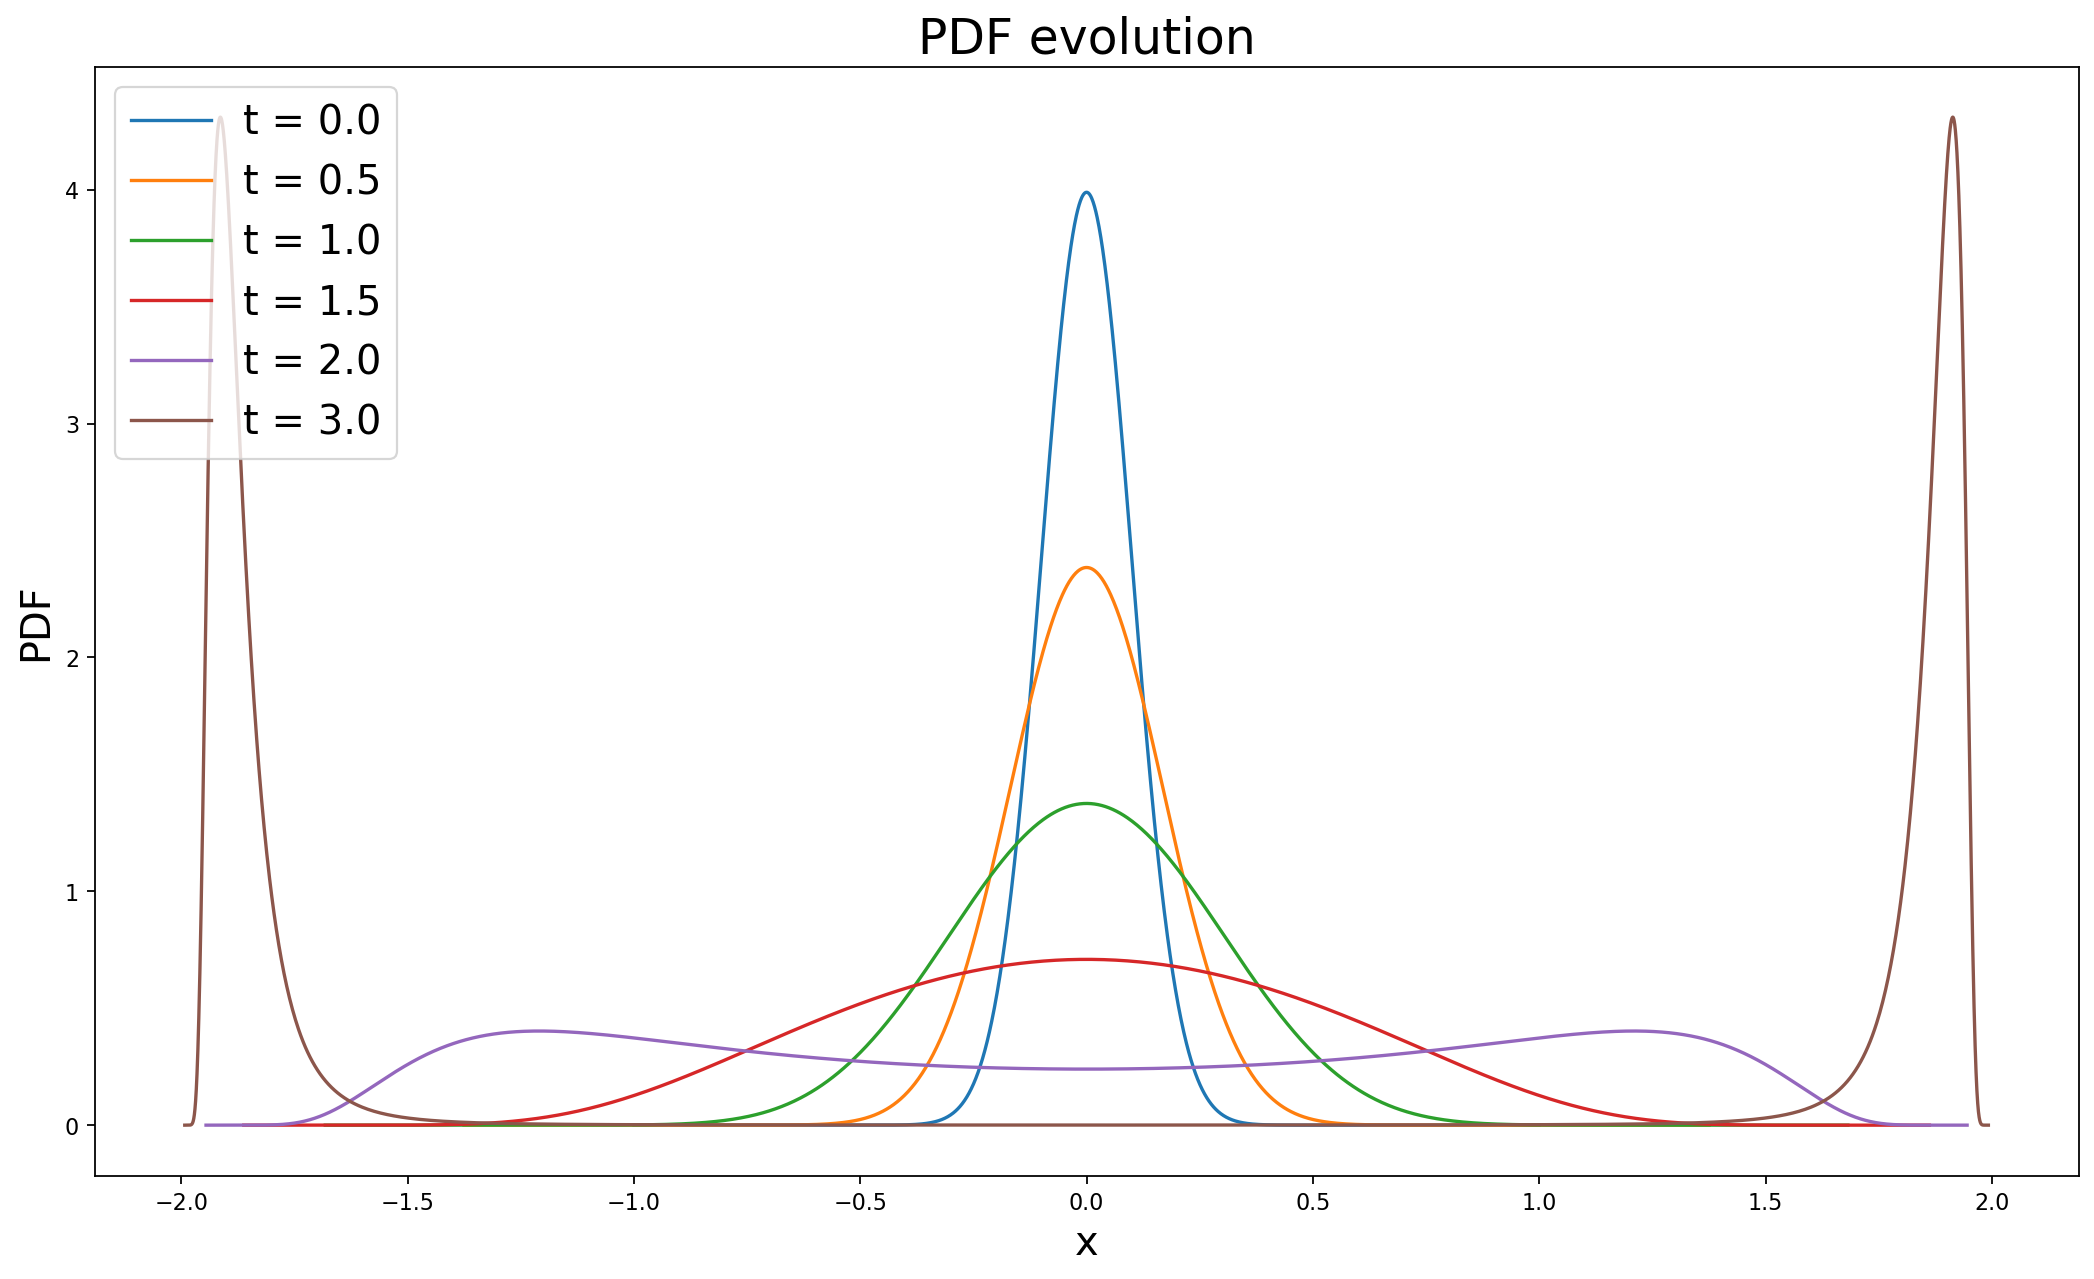

In [43]:
plt.figure(figsize = (16, 9),
           dpi = 160)
plt.plot(x, rho, label = "t = 0.0")
plt.plot(x1, rho1, label = "t = 0.5")
plt.plot(x2, rho2, label = "t = 1.0")
plt.plot(x3, rho3, label = "t = 1.5")
plt.plot(x4, rho4, label = "t = 2.0")
plt.plot(x5, rho5, label = "t = 3.0")
plt.legend(loc = 2,fontsize = 18)
plt.title("PDF evolution", fontsize = 22)
plt.xlabel("x", fontsize = 18)
plt.ylabel("PDF", fontsize = 18)
plt.savefig("1_b.png")

In [60]:
sp.shape

(2000, 300)

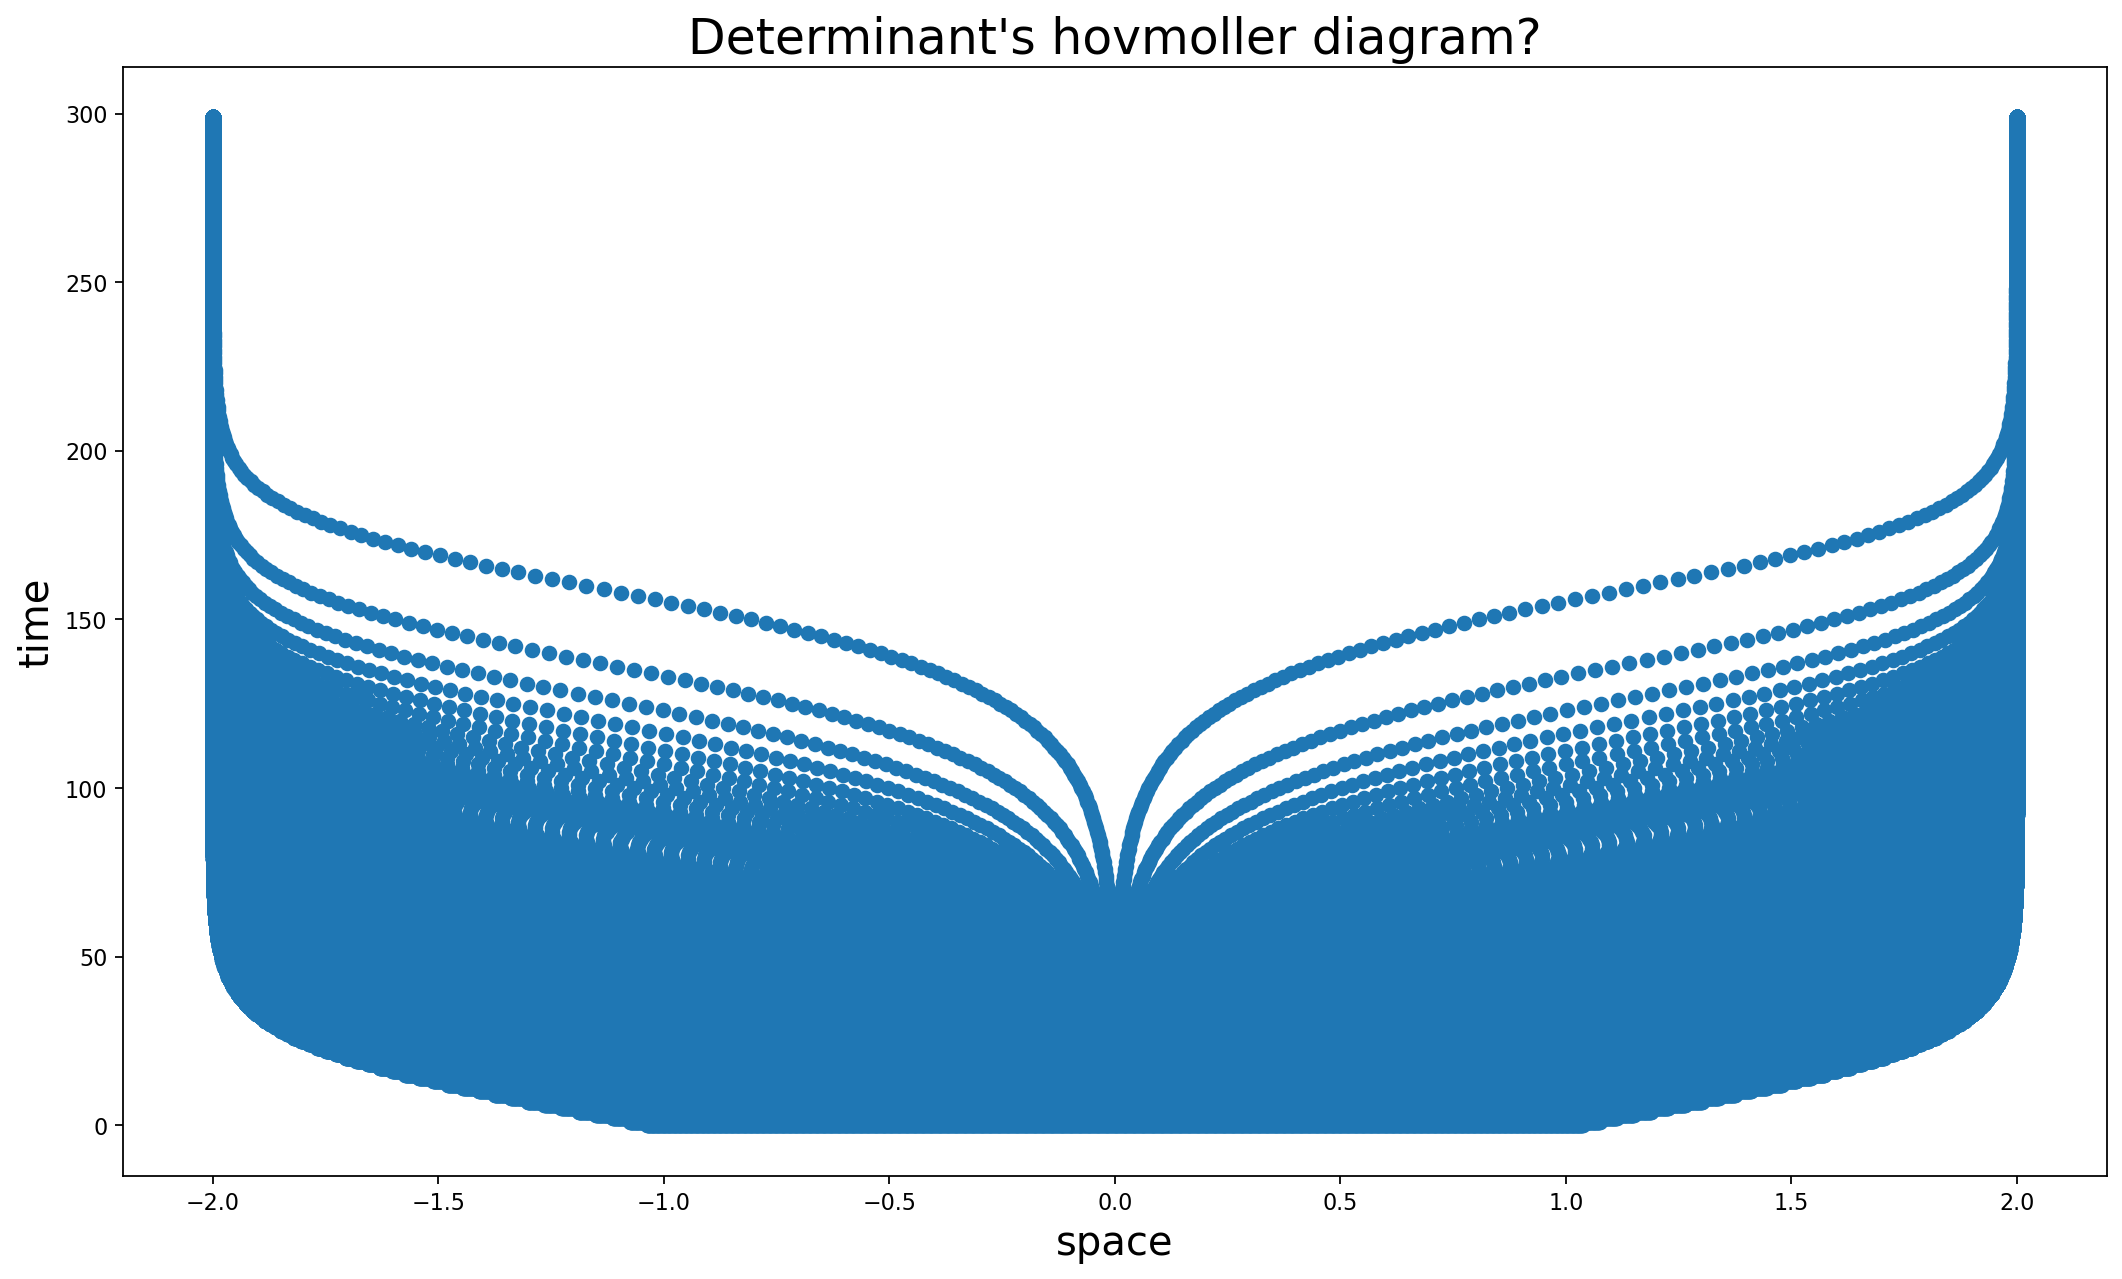

In [72]:
# print(x)
# print(xp)
plt.figure(figsize = (16, 9),
           dpi = 160)
plt.scatter(sp.T, np.tile(np.linspace(0,299,300), reps = (2000,1)).T)
plt.title("Determinant's hovmoller diagram?", fontsize = 22)
plt.xlabel("space", fontsize = 18)
plt.ylabel("time", fontsize = 18)
plt.savefig("1_c.png")
#plt.plot(xp,rhop)

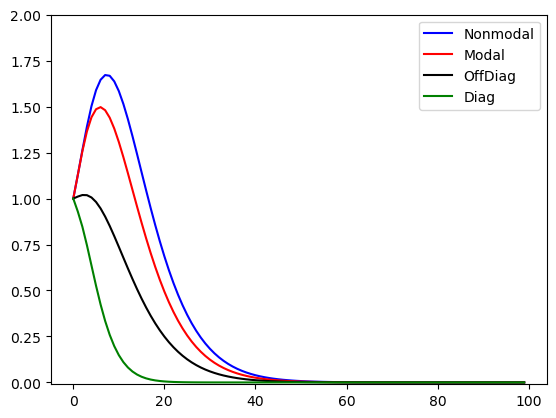

In [77]:
#s = np.random.normal(0, 0.1, 1000)
dim      = 100
growth1  = np.zeros((dim,1))
growth2  = np.zeros((dim,1))
growth3  = np.zeros((dim,1))
growth4  = np.zeros((dim,1))
a        = np.array([[0.9,0.3],
                     [0.0,0.9]])
b        = np.array([[0.9,0.2],
                     [0.0,0.9]])
c        = np.array([[0.8,0.3],
                     [0.0,0.8]])
x_0      = np.array([[0.6463749],[0.76301998]])
for tau in range(0,dim):
    G_tau    = np.linalg.matrix_power(a, tau)
    P_tau    = np.linalg.matrix_power(b, tau)
    R_tau    = np.linalg.matrix_power(c, tau)
    x_tau    = np.matmul(G_tau,x_0)
    y_tau    = np.matmul(P_tau,x_0)
    z_tau    = np.matmul(R_tau,x_0)
    h        = np.matmul(np.matrix(G_tau).getH(),G_tau)
    w,v      = np.linalg.eig(h)
    growth1[tau,:] = np.max(w)
    growth2[tau,:] = np.matmul(np.transpose(x_tau),x_tau)/np.matmul(np.transpose(x_0),x_0)
    growth3[tau,:] = np.matmul(np.transpose(y_tau),y_tau)/np.matmul(np.transpose(x_0),x_0)
    growth4[tau,:] = np.matmul(np.transpose(z_tau),z_tau)/np.matmul(np.transpose(x_0),x_0)

plt.figure()
plt.plot(growth1,'b', label='Nonmodal')
plt.plot(growth2,'r', label='Modal')
plt.plot(growth3,'k', label='OffDiag')
plt.plot(growth4,'g', label='Diag')
plt.ylim(-0.01,2)
plt.legend()

In [4]:
phi = np.array([[0.9,0.3],
                [0.0,0.9]])
eigval, eigvec = np.linalg.eig(phi.T@phi)
eigval = np.diag(eigval)
print(eigval)
print(eigvec)
phit = np.array([[0.9-0.06334,0.3],
                 [0.0,0.9-0.06334]])
eigvalt, eigvect = np.linalg.eig(phit.T@phit)
eigvalt = np.diag(eigvalt)
print(eigvalt)
print(eigvect)

[[0.58127569 0.        ]
 [0.         1.12872431]]
[[-0.76301998 -0.6463749 ]
 [ 0.6463749  -0.76301998]]
[[0.48999996 0.        ]
 [0.         0.99999995]]
[[-0.76696499 -0.64168895]
 [ 0.64168895 -0.76696499]]


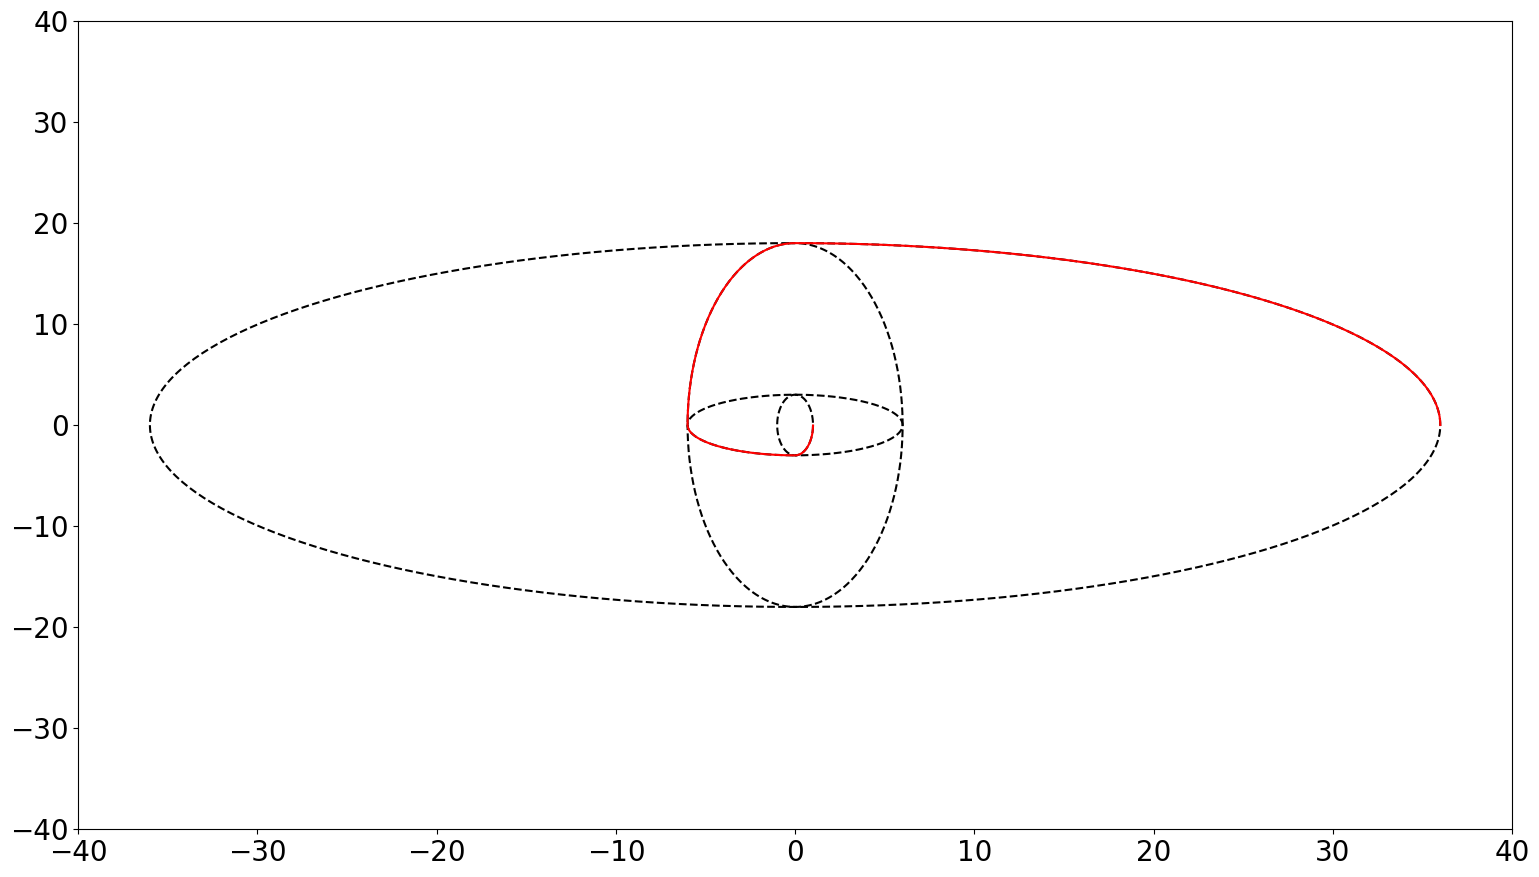

In [279]:
def f(L,y):
    return np.matmul(L,y)

# define RK4 
def rk4(L,t0,y0,tn,n):
    
    # Calculating step size
    h = (tn-t0)/n
    
    #print('\n--------SOLUTION--------')
    #print('-------------------------')    
    #print('x0\ty0\tyn')
    #print('-------------------------')
    for i in range(n):
        k1 = h * (f(L,y0))
        k2 = h * (f(L,(y0+k1/2)))
        k3 = h * (f(L,(y0+k2/2)))
        k4 = h * (f(L,(y0+k3)))
        k = (k1+2*k2+2*k3+k4)/6
        yn = y0 + k
        #print('%.4f\t%.4f\t%.4f'% (x0,y0,yn) )
        #print('-------------------------')
        y0 = yn
        #print(y0)
        t0 = t0+h
    return yn

# see Ch5 of Palmer and Hagedorn 2008 for more details: https://www.cambridge.org/core/books/predictability-of-weather-and-climate/9A8E7E0A16BC8BA928243F46ED192FE6 
# using RK4 for numerical integration
omega1  = 3
omega2  = 0.5
A1      = np.array([[0,1],[-omega1**2,0]])
A2      = np.array([[0,1],[-omega2**2,0]])
v       = np.array([[1],[0]])
record  = np.zeros((400,2))
record[0,:] = np.reshape(v,[2,])
record2 = np.zeros((4,400,2))
t       = 0
count   = 0
for i in range(4):
    # swapping linear operator for every quarterly period
    if (i % 4) == 0:
        A=A1
        omega=omega1
    elif (i % 4) == 1:
        A=A2
        omega=omega2
    elif (i % 4) == 2:
        A=A1
        omega=omega1
    elif (i % 4) == 3:
        A=A2
        omega=omega2
    v_template = v
    for j in range(399): # fixed operator
        t_index          = np.linspace(0,2*np.pi/omega,400)
        v_new            = rk4(A,t_index[j],v_template,t_index[j+1],10)
        record2[i,j,:]   = np.reshape(v_new,[2,])
        v_template       = v_new
    for j in range(100): # swapping linear operators 
        t_index         = np.linspace(0,np.pi/(2*omega),101)
        v_new           = rk4(A,t_index[j],v,t_index[j+1],10)
        record[count,:] = np.reshape(v_new,[2,])
        count           = count+1
        v               = v_new


fig=plt.figure()
plt.plot(record2[0,:-1,0],record2[0,:-1,1],'k--')
plt.plot(record2[1,:-1,0],record2[1,:-1,1],'k--')
plt.plot(record2[2,:-1,0],record2[2,:-1,1],'k--')
plt.plot(record2[3,:-1,0],record2[3,:-1,1],'k--')
plt.plot(record[0:400,0],record[0:400,1],'r')
plt.xlim([-40,40])
plt.ylim([-40,40])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.set_size_inches(18.5, 10.5)